<a href="https://colab.research.google.com/github/fattahar/ML-Sem-7-2025/blob/midterm-transaction-data/midterm_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN

but Gdown can't. Please check connections and permissions.


Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 2. Load Data




In [3]:
BASE_PATH = "/content/drive/MyDrive/midterm_folder"

try:
    print("Sedang membaca dataset...")
    train_transaction = pd.read_csv(f"{BASE_PATH}/train_transaction.csv")
    test_transaction = pd.read_csv(f"{BASE_PATH}/test_transaction.csv")

    print("✅ Data berhasil diload!")
    print(f"Shape Data Train: {train_transaction.shape}")
    print(f"Shape Data Test: {test_transaction.shape}")
except FileNotFoundError:
    print("❌ Error: File tidak ditemukan. Cek lagi nama folder di BASE_PATH.")

Sedang membaca dataset...
✅ Data berhasil diload!
Shape Data Train: (590540, 394)
Shape Data Test: (506691, 393)


In [4]:
train_transaction.head() #isFraud adalah target featurenya

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. EDA (cek fraud)

Distribusi Kelas (isFraud):
isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


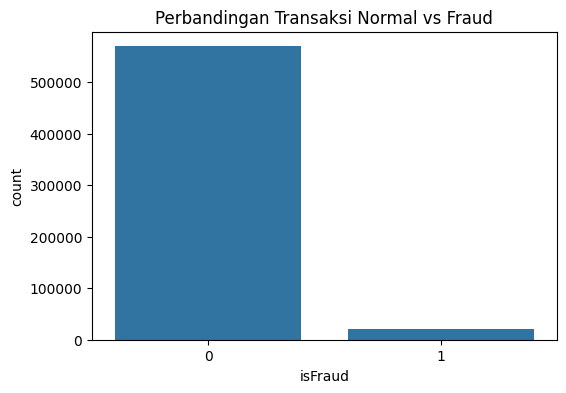

Jumlah baris dengan missing values: 590540


In [6]:
# 3. Cek Imbalance & EDA Singkat
print("Distribusi Kelas (isFraud):")
print(train_transaction['isFraud'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=train_transaction)
plt.title('Perbandingan Transaksi Normal vs Fraud')
plt.show()

# Cek Missing Values (Opsional, hanya untuk info)
print(f"Jumlah baris dengan missing values: {train_transaction.isnull().any(axis=1).sum()}")

# 4. Preprocessing (Clean & Split)

In [7]:
# 4. Preprocessing (Handling Missing Value & Encoding)

# Beri tanda agar nanti bisa dipisah lagi
train_transaction['is_train'] = 1
test_transaction['is_train'] = 0
test_transaction['isFraud'] = -1 # Kolom dummy

# Gabung jadi satu
full_data = pd.concat([train_transaction, test_transaction], axis=0)

print("Mulai Preprocessing...")

# A. Handling Missing Values (Isi NaN)
# Angka diisi median, Teks diisi 'Unknown'
for col in full_data.columns:
    if full_data[col].dtype == 'object':
        full_data[col] = full_data[col].fillna('Unknown')
    else:
        full_data[col] = full_data[col].fillna(full_data[col].median())

# B. Label Encoding (Ubah Teks -> Angka)
cat_cols = full_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    # Ubah ke string dulu untuk jaga-jaga
    full_data[col] = le.fit_transform(full_data[col].astype(str))

# Kembalikan ke Train dan Test
train_clean = full_data[full_data['is_train'] == 1].drop(['is_train'], axis=1)
test_clean = full_data[full_data['is_train'] == 0].drop(['is_train', 'isFraud'], axis=1)

print("✅ Preprocessing Selesai!")

Mulai Preprocessing...
✅ Preprocessing Selesai!


In [8]:

# Pisahkan Fitur (X) dan Target (y)
X = train_clean.drop(['isFraud', 'TransactionID'], axis=1)
y = train_clean['isFraud']

# Ambil TransactionID test untuk submission nanti
test_ids = test_clean['TransactionID']
X_test_final = test_clean.drop(['TransactionID'], axis=1)

# Split 80% Train, 20% Validasi
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data Train: {X_train.shape}")
print(f"Data Validasi: {X_val.shape}")

Data Train: (472432, 392)
Data Validasi: (118108, 392)


# 5. Training Model (Random Forest)

In [9]:
# 6. Training Model
print("Sedang melatih model Random Forest... (Mohon tunggu, bisa 2-5 menit)")

# n_estimators=50 agar tidak terlalu berat di Colab
model = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print("✅ Training Selesai!")

Sedang melatih model Random Forest... (Mohon tunggu, bisa 2-5 menit)
✅ Training Selesai!


# 7. Evaluasi hasil training

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.93      0.41      0.57      4133

    accuracy                           0.98    118108
   macro avg       0.96      0.70      0.78    118108
weighted avg       0.98      0.98      0.97    118108

ROC-AUC Score: 0.9230


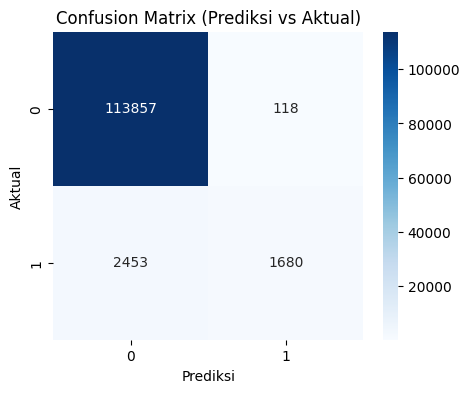

In [12]:
# Prediksi ke data validasi
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1] # Ambil probabilitas fraud

# Print Skor
print("Classification Report:")
print(classification_report(y_val, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_val, y_prob):.4f}")

# Gambar Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Prediksi vs Aktual)')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# 8. Submission (Output Akhir)

In [11]:
print("Membuat prediksi untuk data Test...")
final_prob = model.predict_proba(X_test_final)[:, 1]

submission = pd.DataFrame({
    'TransactionID': test_ids,
    'isFraud': final_prob
})

# Simpan ke CSV
submission.to_csv('submission_midterm.csv', index=False)
print("✅ File 'submission_midterm.csv' berhasil dibuat! Silakan download dari menu Files di kiri.")

Membuat prediksi untuk data Test...
✅ File 'submission_midterm.csv' berhasil dibuat! Silakan download dari menu Files di kiri.
